# Extracting youtube data from notebook

- In this notebook we will use a notebook with indian comedy videos and extract the data from it.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from tkinter import filedialog

In [48]:
file_name = filedialog.askopenfilename()
file_path = os.path.dirname(file_name)
df = pd.read_csv(file_name)
df

,channel_name,video_id,type,video_title,view_count,like_count,dislike_count,favoriteCount,commentCount,publishedAt
0,Aakash Gupta,rVaiKp6VDCQ,youtube#video,Which Paan? | Aakash Gupta | #shorts #comedysh...,392658,56185,0,0,189,2022-03-01T04:47:41Z
1,Aakash Gupta,FZ77MTzLdE0,youtube#video,Delhi Boys I Aakash Gupta | #Shorts,454505,56850,0,0,143,2022-02-24T09:16:38Z
2,Aakash Gupta,AI0wH097nkM,youtube#video,Watch Couple Goals season 3 on Amazon Mini TV ...,199512,17059,0,0,93,2022-02-24T08:45:39Z
3,Aakash Gupta,6d2wzfx4sRs,youtube#video,Paan | Stand-up Comedy by Aakash Gupta,9028403,863721,0,0,7769,2022-02-20T16:10:06Z
4,Aakash Gupta,S-0ZoAfC-4Q,youtube#video,Couple Goals Trailer | Aakash Gupta | Watch No...,541338,28787,0,0,572,2022-02-14T13:05:08Z
...,...,...,...,...,...,...,...,...,...,...
5974,Zakir Khan,jCt-kZmO3Dk,youtube#video,How to be cool at an airport | Zakir khan Stan...,10848117,181682,0,0,1204,2015-04-13T21:54:19Z
5975,Zakir Khan,Y84MrUqYfYg,youtube#video,Rajnikant level concentration sported befor a ...,230133,5243,0,0,40,2015-03-01T10:35:25Z
5976,Zakir Khan,Yr7ULwvzOYw,youtube#video,Zakir khan - when my father took my gf's call,4967998,116086,0,0,646,2015-01-13T10:34:29Z
5977,Zakir Khan,oVekIQ726Ho,youtube#video,Zakir khan - Sharabi dost aur Kejriwal,1966660,23291,0,0,88,2015-01-09T13:13:52Z


# Data analysis for interesting statistics

KeyError: 'views'

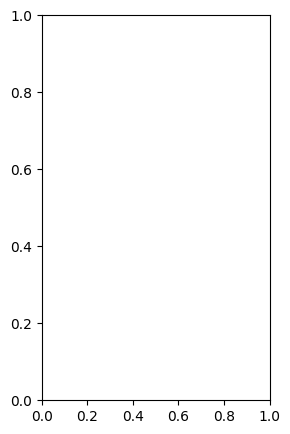

In [10]:
# Plot the distribution of the number of views, average views and amount of views
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['views'], bins=20, kde=True)
plt.title('Distribution of views')  

In [49]:
# Group the table by channel, get the average views for all of its videos. Get the link of the video with largest views and the latest video
df['date'] = pd.to_datetime(df['publishedAt'])
if 'publishedAt' in df.columns:
    del df['publishedAt']
df['date'].min(), df['date'].max()

(Timestamp('2007-07-15 11:08:12+0000', tz='UTC'),
 Timestamp('2022-03-17 14:16:31+0000', tz='UTC'))

In [50]:

df_now

,channel_name,video_id,type,video_title,view_count,like_count,dislike_count,favoriteCount,commentCount,date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
5974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [56]:
# do this per channel
df[df['view_count'] == df['view_count'].max()]
df[df.groupby('channel_name')['view_count'].transform('max') == df['view_count']].to_csv('max_views.csv', index=False)

In [34]:
df[df.groupby('channel_name')['view_count'].transform('mean') == df['view_count']]


,channel_name,video_id,type,video_title,view_count,like_count,dislike_count,favoriteCount,commentCount,publishedAt


In [30]:
df[df["video_id"] == "rVaiKp6VDCQ"]

,channel_name,video_id,type,video_title,view_count,like_count,dislike_count,favoriteCount,commentCount,date,average_views_all_videos,max_views_all_videos,min_views_all_videos,latest_video
0,Aakash Gupta,rVaiKp6VDCQ,youtube#video,Which Paan? | Aakash Gupta | #shorts #comedysh...,392658,56185,0,0,189,2022-03-01 04:47:41+00:00,8.332998e+06,24250811,199512,2022-03-01 04:47:41+00:00


In [24]:
df["average_views_all_videos"] = df.groupby('channel_name')['view_count'].transform('mean')
df["max_views_all_videos"] = df.groupby('channel_name')['view_count'].transform('max')
df["min_views_all_videos"] = df.groupby('channel_name')['view_count'].transform('min')
df["latest_video"] = df.groupby('channel_name')['date'].transform('max')


,channel_name,video_id,type,video_title,view_count,like_count,dislike_count,favoriteCount,commentCount,date,average_views_all_videos,max_views_all_videos,min_views_all_videos,latest_video
0,Aakash Gupta,rVaiKp6VDCQ,youtube#video,Which Paan? | Aakash Gupta | #shorts #comedysh...,392658,56185,0,0,189,2022-03-01 04:47:41+00:00,8.332998e+06,24250811,199512,2022-03-01 04:47:41+00:00
1,Aakash Gupta,FZ77MTzLdE0,youtube#video,Delhi Boys I Aakash Gupta | #Shorts,454505,56850,0,0,143,2022-02-24 09:16:38+00:00,8.332998e+06,24250811,199512,2022-03-01 04:47:41+00:00
2,Aakash Gupta,AI0wH097nkM,youtube#video,Watch Couple Goals season 3 on Amazon Mini TV ...,199512,17059,0,0,93,2022-02-24 08:45:39+00:00,8.332998e+06,24250811,199512,2022-03-01 04:47:41+00:00
3,Aakash Gupta,6d2wzfx4sRs,youtube#video,Paan | Stand-up Comedy by Aakash Gupta,9028403,863721,0,0,7769,2022-02-20 16:10:06+00:00,8.332998e+06,24250811,199512,2022-03-01 04:47:41+00:00
4,Aakash Gupta,S-0ZoAfC-4Q,youtube#video,Couple Goals Trailer | Aakash Gupta | Watch No...,541338,28787,0,0,572,2022-02-14 13:05:08+00:00,8.332998e+06,24250811,199512,2022-03-01 04:47:41+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5974,Zakir Khan,jCt-kZmO3Dk,youtube#video,How to be cool at an airport | Zakir khan Stan...,10848117,181682,0,0,1204,2015-04-13 21:54:19+00:00,5.788051e+06,66252090,223632,2021-12-30 08:34:16+00:00
5975,Zakir Khan,Y84MrUqYfYg,youtube#video,Rajnikant level concentration sported befor a ...,230133,5243,0,0,40,2015-03-01 10:35:25+00:00,5.788051e+06,66252090,223632,2021-12-30 08:34:16+00:00
5976,Zakir Khan,Yr7ULwvzOYw,youtube#video,Zakir khan - when my father took my gf's call,4967998,116086,0,0,646,2015-01-13 10:34:29+00:00,5.788051e+06,66252090,223632,2021-12-30 08:34:16+00:00
5977,Zakir Khan,oVekIQ726Ho,youtube#video,Zakir khan - Sharabi dost aur Kejriwal,1966660,23291,0,0,88,2015-01-09 13:13:52+00:00,5.788051e+06,66252090,223632,2021-12-30 08:34:16+00:00


In [25]:
# only one row per channel
df.drop_duplicates(subset='channel_name', keep='first', inplace=True)

In [26]:
df

,channel_name,video_id,type,video_title,view_count,like_count,dislike_count,favoriteCount,commentCount,date,average_views_all_videos,max_views_all_videos,min_views_all_videos,latest_video
0,Aakash Gupta,rVaiKp6VDCQ,youtube#video,Which Paan? | Aakash Gupta | #shorts #comedysh...,392658,56185,0,0,189,2022-03-01 04:47:41+00:00,8.332998e+06,24250811,199512,2022-03-01 04:47:41+00:00
26,Abhishek Upmanyu,TjzTNneOkU8,youtube#video,Koi Manhoos Nahi Hota,797701,68702,0,0,375,2022-02-16 14:50:48+00:00,1.705251e+07,46675552,634726,2022-02-16 14:50:48+00:00
44,Abijit Ganguly,lpmmznmCpRQ,youtube#video,Millennial Couple | 1 - Kal #shorts,295201,8184,0,0,33,2022-02-17 13:45:25+00:00,1.197143e+06,6783670,26491,2022-02-17 13:45:25+00:00
95,Aditi Mittal,VDXMvecgEGQ,youtube#video,Chipkali | Stand Up Comedy By Aditi Mittal,13492,705,0,0,35,2022-02-17 15:51:23+00:00,3.517490e+05,10570986,2070,2022-02-17 15:51:23+00:00
157,Aishwarya Mohanraj,VrkXYQRhBeU,youtube#video,HE PROPOSED!!! | VLOG 07,3573353,277519,0,0,9566,2022-03-04 13:30:34+00:00,3.318370e+06,13191036,171433,2022-03-04 13:30:34+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,Varun Thakur,ApqqmD-STpQ,youtube#video,"The Internet Said So | EP 123 | Mermaids, Cogn...",55340,2883,0,0,207,2022-03-15 05:37:29+00:00,2.617440e+05,4093617,15294,2022-03-15 05:37:29+00:00
5665,Vijay Yadav,nQxTTvX7N9k,youtube#video,Forced CrowdWork 3.1 | Tour Dates | Vijay Yadav,196667,11739,0,0,332,2022-03-10 15:36:47+00:00,2.040693e+06,6823658,28477,2022-03-10 15:36:47+00:00
5691,Vipul Goyal,l7XqIePEcH8,youtube#video,In Conversation with IIT Bombay Batchmate | OM...,269262,11855,0,0,354,2021-09-11 11:29:22+00:00,1.497199e+06,7440580,64065,2021-09-11 11:29:22+00:00
5732,Vir Das,Mhuien3f0e8,youtube#video,Level Up. #WantedTour 2022 we hit America in M...,16659,1141,0,0,63,2022-02-02 15:05:35+00:00,3.250760e+05,9621004,4282,2022-02-02 15:05:35+00:00
